<a href="https://colab.research.google.com/github/ArthurKuster19/PDS---Trabalho-01---Arthur-e-Gabriel/blob/main/Trabalho_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import find_peaks

In [6]:
# Frequências do sistema DTMF
freq_row = [697, 770, 852, 941]  # Frequências das linhas
freq_col = [1209, 1336, 1477, 1633]  # Frequências das colunas

# Mapeamento dos dígitos para frequências de linha e coluna
dtmf_frequencies = {
    '1': (697, 1209), '2': (697, 1336), '3': (697, 1477),
    '4': (770, 1209), '5': (770, 1336), '6': (770, 1477),
    '7': (852, 1209), '8': (852, 1336), '9': (852, 1477),
    '*': (941, 1209), '0': (941, 1336), '#': (941, 1477)
}


In [7]:
def gerar_sinal_dtmf(digito, duracao=0.5, taxa_amostragem=8000):
    t = np.linspace(0, duracao, int(taxa_amostragem * duracao), endpoint=False)
    if digito in dtmf_frequencies:
        f_row, f_col = dtmf_frequencies[digito]
        sinal = np.sin(2 * np.pi * f_row * t) + np.sin(2 * np.pi * f_col * t)
        return sinal
    else:
        raise ValueError("Dígito inválido.")


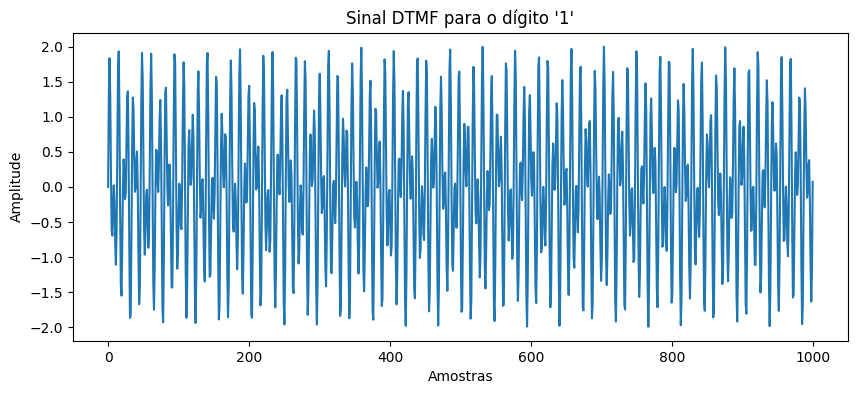

In [12]:
# Escolher um dígito para teste
digito = '1'
sinal = gerar_sinal_dtmf(digito)

# Plotar o sinal gerado
plt.figure(figsize=(10, 4))
plt.plot(sinal[:1000])  # Exibindo apenas os primeiros pontos para visualização
plt.title(f"Sinal DTMF para o dígito '{digito}'")
plt.xlabel("Amostras")
plt.ylabel("Amplitude")
plt.show()


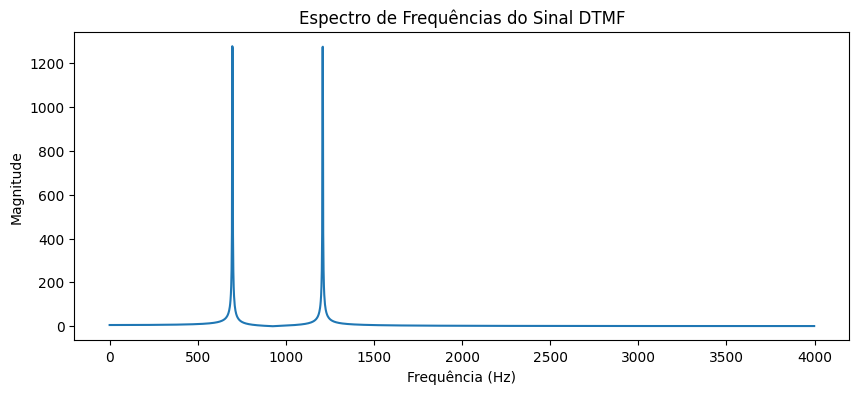

In [13]:
def aplicar_fft(sinal, taxa_amostragem=8000):
    # Aplicar a FFT
    fft_resultado = fft(sinal)
    freqs = np.fft.fftfreq(len(fft_resultado), 1/taxa_amostragem)

    # Plotar o espectro de frequências
    plt.figure(figsize=(10, 4))
    plt.plot(freqs[:len(freqs)//2], np.abs(fft_resultado[:len(fft_resultado)//2]))
    plt.title("Espectro de Frequências do Sinal DTMF")
    plt.xlabel("Frequência (Hz)")
    plt.ylabel("Magnitude")
    plt.show()

    return freqs, np.abs(fft_resultado)

freqs, magnitudes = aplicar_fft(sinal)


In [14]:
def detectar_frequencias_dominantes(freqs, magnitudes, threshold=500):
    peaks, _ = find_peaks(magnitudes, height=threshold)
    frequencias_dominantes = freqs[peaks]
    return frequencias_dominantes

frequencias_dominantes = detectar_frequencias_dominantes(freqs, magnitudes)
print("Frequências Dominantes Detectadas:", frequencias_dominantes)


Frequências Dominantes Detectadas: [  696.  1210. -1210.  -696.]


In [15]:
def decodificar_dtmf(frequencias):
    # Ordena as frequências para simplificar a comparação
    f1, f2 = sorted(frequencias[:2])  # Usando as duas frequências mais fortes

    # Encontrar o par de frequências mais próximo do mapa DTMF
    for digito, (row, col) in dtmf_frequencies.items():
        if abs(f1 - row) < 10 and abs(f2 - col) < 10:
            return digito
    return None

# Decodificar o dígito a partir das frequências dominantes
digito_decodificado = decodificar_dtmf(frequencias_dominantes)
print("Dígito Decodificado:", digito_decodificado)


Dígito Decodificado: 1
